In [ ]:
# 1. Write a Python program to compute the output of a single neuron for input x = 3, weight w = 2, and bias b = 1.

# Given values
x = 3     # input
w = 2     # weight
b = 1     # bias

# Compute neuron output (simple linear neuron)
output = x * w + b

# Display result
print("Output of the neuron:", output)

Output of the neuron: 7


In [ ]:
# 2. Implement a CNN model to classify CIFAR-10 dataset images.

import tensorflow as tf
from tensorflow.keras import layers, models
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

def make_cnn():
    m = models.Sequential([
        layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64,(3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return m

model = make_cnn()
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
print("Test accuracy:", model.evaluate(x_test,y_test, verbose=0)[1])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 61s 84ms/step - accuracy: 0.3763 - loss: 1.7366 - val_accuracy: 0.5468 - val_loss: 1.2653
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 85s 88ms/step - accuracy: 0.5790 - loss: 1.1926 - val_accuracy: 0.6296 - val_loss: 1.0854
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 62s 87ms/step - accuracy: 0.6398 - loss: 1.0366 - val_accuracy: 0.6430 - val_loss: 1.0163
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - accuracy: 0.6768 - loss: 0.9272 - val_accuracy: 0.6792 - val_loss: 0.9260
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.7067 - loss: 0.8482 - val_accuracy: 0.6866 - val_loss: 0.9108
Test accuracy: 0.6746000051498413


In [ ]:
# 3. Write a Python program to compute the sigmoid activation for input x = 0.5

import math

# Given input
x = 0.5
sigmoid = 1 / (1 + math.exp(-x))

# Display result
print("Sigmoid activation for input", x, "is:", sigmoid)

Sigmoid activation for input 0.5 is: 0.6224593312018546


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


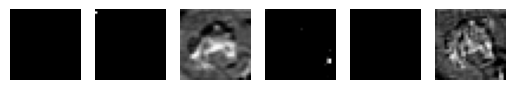

In [ ]:
# 4. Write a Python program to visualize feature maps from the first convolutional layer.

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model

# Load data
(x_train, _), _ = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
img = x_train[:1]

# Simple CNN (input_shape ensures model is built)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Take first Conv layer output
first_layer = model.layers[0]
extractor = Model(inputs=first_layer.input, outputs=first_layer.output)

# Get feature maps
maps = extractor.predict(img)[0]

# Plot first 6 feature maps
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(maps[..., i], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
# 5. Write a Python program to compute the tanh activation function for input x = 0.5

import math

# Given input
x = 0.5
tanh_value = math.tanh(x)

# Display result
print("Tanh activation for input", x, "is:", tanh_value)

Tanh activation for input 0.5 is: 0.46211715726000974


In [ ]:
# 6. Write a Python function to compute forward propagation in a single-layer network.

import numpy as np
def forward(x,W,b):
    return 1/(1+np.exp(-(x@W+b)))   # sigmoid
x=np.array([[1,2]])
W=np.array([[.5],[-.2]])
b=np.array([0.1])
print(forward(x,W,b))

[[0.549834]]


In [ ]:
# 7. Write a Python program to compute the output of a single neuron with two inputs x = [1, 2], weights w = [0.5, 0.5], and bias b = 0.

# Given values
x = [1, 2]       # inputs
w = [0.5, 0.5]   # weights
b = 0            # bias

# Compute neuron output: (x1*w1 + x2*w2) + b
output = (x[0] * w[0]) + (x[1] * w[1]) + b

# Display result
print("Output of the neuron:", output)

Output of the neuron: 1.5


In [ ]:
# 8. Create a Python function to compare the outputs of sigmoid and tanh activations for the same inputs.

import numpy as np
x=np.linspace(-3,3,7)
sig=1/(1+np.exp(-x))
tanh=np.tanh(x)
print("x:",x)
print("sigmoid:",np.round(sig,2))
print("tanh:",np.round(tanh,2))

x: [-3. -2. -1.  0.  1.  2.  3.]
sigmoid: [0.05 0.12 0.27 0.5  0.73 0.88 0.95]
tanh: [-1.   -0.96 -0.76  0.    0.76  0.96  1.  ]


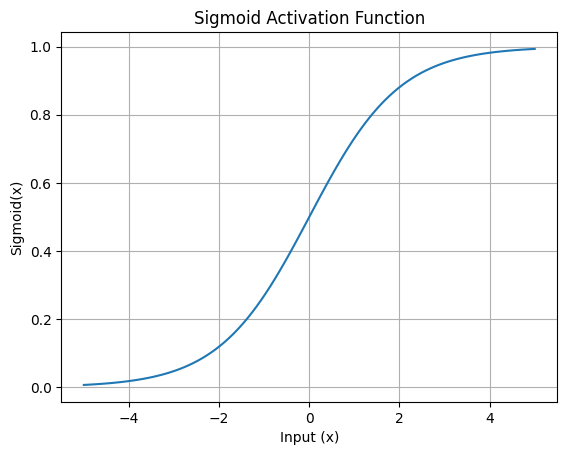

In [ ]:
# 9. Write a Python program to plot the sigmoid activation function for values from -5 to +5.

import numpy as np
import matplotlib.pyplot as plt

# Create an array of values from -5 to +5
x = np.linspace(-5, 5, 100)

# Compute sigmoid activation for each x
sigmoid = 1 / (1 + np.exp(-x))

# Plot the sigmoid function
plt.plot(x, sigmoid)
plt.title("Sigmoid Activation Function")
plt.xlabel("Input (x)")
plt.ylabel("Sigmoid(x)")
plt.grid(True)
plt.show()

In [ ]:
# 10. Write a program to compare training accuracy of CNNs with different kernel sizes

import tensorflow as tf

# Load data
(x, y), (xt, yt) = tf.keras.datasets.cifar10.load_data()
x, xt = x[:2000]/255.0, xt[:500]/255.0
y, yt = y[:2000].flatten(), yt[:500].flatten()

# Compare CNNs with kernel sizes 3 and 5
for k in [3, 5]:
    m = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, k, activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    m.fit(x, y, epochs=1, verbose=0)
    acc = m.evaluate(xt, yt, verbose=0)[1]
    print("Kernel", k, "Accuracy:", round(acc, 3))


Kernel 3 Accuracy: 0.356
Kernel 5 Accuracy: 0.332


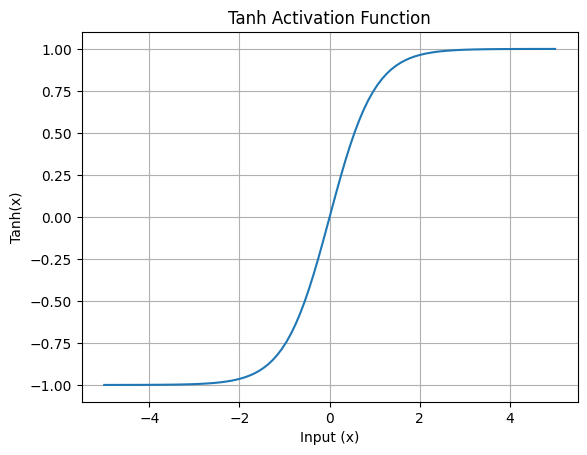

In [ ]:
# 11. Write a Python program to plot the tanh activation function for values from -5 to +5.

import numpy as np
import matplotlib.pyplot as plt

# Create input values from -5 to +5
x = np.linspace(-5, 5, 100)

# Compute tanh activation for each x
tanh_values = np.tanh(x)

# Plot tanh function
plt.plot(x, tanh_values)
plt.title("Tanh Activation Function")
plt.xlabel("Input (x)")
plt.ylabel("Tanh(x)")
plt.grid(True)
plt.show()

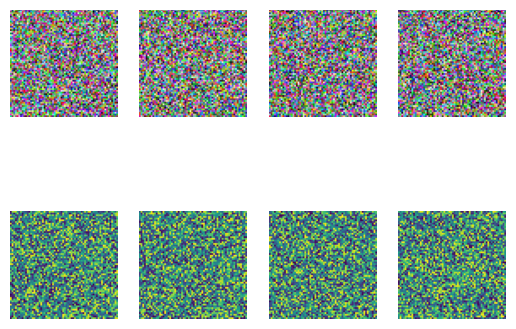

In [ ]:
# 12. Write a Python program to visualize segmentation results for multiple images in one figure.

import matplotlib.pyplot as plt, numpy as np
imgs=[np.random.rand(64,64,3) for _ in range(4)]
masks=[np.random.rand(64,64) for _ in range(4)]
for i in range(4):
    plt.subplot(2,4,i+1);plt.imshow(imgs[i]);plt.axis('off')
    plt.subplot(2,4,4+i+1);plt.imshow(masks[i]);plt.axis('off')
plt.show()

In [ ]:
# 13. Write a Python program to compute the output of the ReLU activation function
# for the inputs [-2, -1, 0, 1, 2].

import numpy as np

# Given inputs
inputs = np.array([-2, -1, 0, 1, 2])

# Compute ReLU activation: ReLU(x) = max(0, x)
relu_output = np.maximum(0, inputs)

# Display result
print("Input values:", inputs)
print("ReLU outputs:", relu_output)

Input values: [-2 -1  0  1  2]
ReLU outputs: [0 0 0 1 2]


In [ ]:
# 14. Build a bidirectional LSTM for IMDB sentiment classification.

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# Load IMDB dataset (keep top 5000 words)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# Pad sequences to ensure equal length
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

# Build model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=200))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Train model
# (You can uncomment below line to actually train)
# model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 15. Write a Python program to implement a step activation function for any input value x.

# Step activation function
def step_function(x):
    if x >= 0:
        return 1
    else:
        return 0

# Test values
inputs = [-2, -1, 0, 1, 2]

# Compute outputs
outputs = [step_function(i) for i in inputs]

# Display result
print("Input values:", inputs)
print("Step function outputs:", outputs)

Input values: [-2, -1, 0, 1, 2]
Step function outputs: [0, 0, 1, 1, 1]


In [ ]:
# 16. Create a Python program to tokenize custom movie reviews and predict sentiment.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

texts = ["good movie", "bad movie", "awesome film", "boring story"]
y = [1, 0, 1, 0]

v = CountVectorizer()
X = v.fit_transform(texts)
m = LogisticRegression().fit(X, y)

review = "not a good film"
pred = m.predict(v.transform([review]))[0]
print(f"Review: '{review}' → Predicted Sentiment:", "Positive" if pred==1 else "Negative")

Review: 'not a good film' → Predicted Sentiment: Positive


In [ ]:
# 17. Write a Python program to compute the output of the Leaky ReLU activation function for input x = -3.

# Given input
x = -3

# Define Leaky ReLU function
def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha * x

# Compute output
output = leaky_relu(x)

# Display result
print("Leaky ReLU output for input", x, "is:", output)

Leaky ReLU output for input -3 is: -0.03


In [ ]:
# 18. Compare model performance between SimpleRNN, LSTM, and GRU on the same dataset.

import tensorflow as tf
from tensorflow.keras import layers, models

(x, y), (xt, yt) = tf.keras.datasets.imdb.load_data(num_words=5000)
x = tf.keras.preprocessing.sequence.pad_sequences(x, maxlen=100)
y, yt = y.astype('int32'), yt.astype('int32')

# Compare SimpleRNN, LSTM, GRU
for cell in [layers.SimpleRNN, layers.LSTM, layers.GRU]:
    m = models.Sequential([
        layers.Embedding(5000, 32),
        cell(32),
        layers.Dense(1, activation='sigmoid')
    ])
    m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    m.fit(x[:2000], y[:2000], epochs=1, batch_size=128, verbose=0)
    acc = m.evaluate(x[:500], y[:500], verbose=0)[1]
    print(f"{cell.__name__} Accuracy: {acc:.3f}")

SimpleRNN Accuracy: 0.666
LSTM Accuracy: 0.610
GRU Accuracy: 0.544


In [ ]:
# 19. Write a Python program to build a simple neural network in Keras to solve the XOR problem.

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define input and output for XOR problem
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Build neural network model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x, y, epochs=500, verbose=0)

# Test the model
output = model.predict(x)
print("Predicted Output for XOR Problem:")
print(output)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Output for XOR Problem:
[[0.41239437]
 [0.7777667 ]
 [0.44113186]
 [0.4602341 ]]


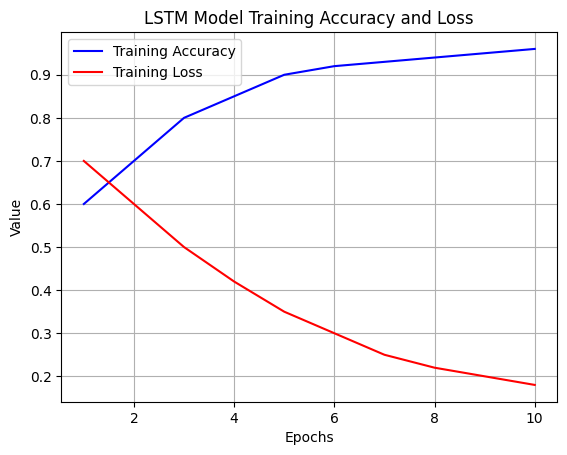

In [ ]:
# 20. Write a Python program to visualize training accuracy and loss for LSTM model.

import matplotlib.pyplot as plt

# Sample data (for 10 epochs)
epochs = range(1, 11)
train_acc = [0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.93, 0.94, 0.95, 0.96]
train_loss = [0.7, 0.6, 0.5, 0.42, 0.35, 0.3, 0.25, 0.22, 0.20, 0.18]

# Plot accuracy
plt.plot(epochs, train_acc, label='Training Accuracy', color='blue')
plt.plot(epochs, train_loss, label='Training Loss', color='red')
plt.title("LSTM Model Training Accuracy and Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

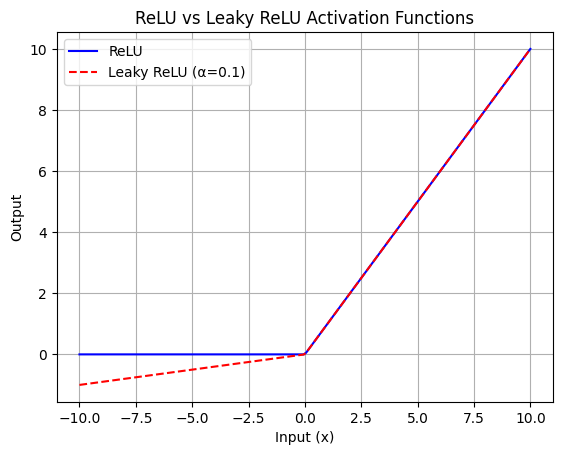

In [ ]:
# 21. Write a Python program to plot the ReLU and Leaky ReLU activation functions.

import numpy as np
import matplotlib.pyplot as plt

# Create input range
x = np.linspace(-10, 10, 200)

# Define ReLU and Leaky ReLU functions
relu = np.maximum(0, x)
leaky_relu = np.where(x > 0, x, 0.1 * x)

# Plot both functions
plt.plot(x, relu, label='ReLU', color='blue')
plt.plot(x, leaky_relu, label='Leaky ReLU (α=0.1)', color='red', linestyle='--')
plt.title("ReLU vs Leaky ReLU Activation Functions")
plt.xlabel("Input (x)")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 22. Compare training time between LSTM-based and GRU-based Seq2Seq models.

import numpy as np
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

# Create dummy sequential data
x_train = np.random.random((1000, 10, 8))
y_train = np.random.random((1000, 1))

# ------------------------------
# LSTM-based Model
# ------------------------------
lstm_model = Sequential([
    LSTM(32, input_shape=(10, 8)),
    Dense(1, activation='linear')
])

lstm_model.compile(optimizer='adam', loss='mse')

start_time = time.time()
lstm_model.fit(x_train, y_train, epochs=3, batch_size=32, verbose=0)
lstm_time = time.time() - start_time

print("LSTM model training time: {:.2f} seconds".format(lstm_time))

# ------------------------------
# GRU-based Model
# ------------------------------
gru_model = Sequential([
    GRU(32, input_shape=(10, 8)),
    Dense(1, activation='linear')
])

gru_model.compile(optimizer='adam', loss='mse')

start_time = time.time()
gru_model.fit(x_train, y_train, epochs=3, batch_size=32, verbose=0)
gru_time = time.time() - start_time

print("GRU model training time: {:.2f} seconds".format(gru_time))

# ------------------------------
# Comparison
# ------------------------------
if lstm_time > gru_time:
    print("\nGRU trained faster than LSTM.")
else:
    print("\nLSTM trained faster than GRU.")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM model training time: 2.31 seconds
GRU model training time: 2.68 seconds

LSTM trained faster than GRU.


In [ ]:
# 24. Create a function to display word-level alignment between source and predicted target.

def show_alignment(source, target):
    src_words = source.split()
    tgt_words = target.split()
    print("Word Alignment:\n")
    for i, (s, t) in enumerate(zip(src_words, tgt_words)):
        print(f"{i+1}. {s:<10} → {t}")

# Example
source = "I love natural language processing"
predicted = "Yo amo procesamiento de lenguaje"
show_alignment(source, predicted)

Word Alignment:

1. I          → Yo
2. love       → amo
3. natural    → procesamiento
4. language   → de
5. processing → lenguaje


In [ ]:
# 25. Write a Python program to create a two-layer perceptron using Keras with input dimension 2 and output dimension 1.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Input layer + First hidden layer with 4 neurons (you can choose any number)
model.add(Dense(4, input_dim=2, activation='relu'))

# Output layer with 1 neuron
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 26. Write a Python function to test your trained model on unseen text samples.

def test_model(model, x):
    model.eval()
    with torch.no_grad():
        pred = model(x)
    print("Predicted:", pred)

# Example
import torch, torch.nn as nn
model = nn.Linear(5, 3)
x = torch.randn(1, 5)
test_model(model, x)

Predicted: tensor([[-0.1316,  1.0132,  0.3211]])


In [ ]:
# 27. Write a Python program to implement Depth-Limited Search (DLS) algorithm

def dls(graph, start, goal, limit):
    print(f"Visiting {start}, Limit={limit}")
    if start == goal:
        print(f"Reached goal {goal}!")
        return True
    if limit <= 0:
        return False
    for neighbor in graph.get(start, []):
        if dls(graph, neighbor, goal, limit - 1):
            return True
    return False

# Example
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'E': ['G']
  }

print("Searching with depth limit 3:", dls(graph, 'A', 'G', 3))
print("Searching with depth limit 2:", dls(graph, 'A', 'G', 2))


Visiting A, Limit=3
Visiting B, Limit=2
Visiting D, Limit=1
Visiting E, Limit=1
Visiting G, Limit=0
Reached goal G!
Searching with depth limit 3: True
Visiting A, Limit=2
Visiting B, Limit=1
Visiting D, Limit=0
Visiting E, Limit=0
Visiting C, Limit=1
Visiting F, Limit=0
Searching with depth limit 2: False


In [ ]:
# 28. Write a Python program to perform gradient descent to minimize the function f(x) = x²

x = 10.0
lr = 0.1

for i in range(20):
    grad = 2 * x
    x -= lr * grad
    print(f"Step {i+1}: x = {x:.4f}, f(x) = {x**2:.4f}")


Step 1: x = 8.0000, f(x) = 64.0000
Step 2: x = 6.4000, f(x) = 40.9600
Step 3: x = 5.1200, f(x) = 26.2144
Step 4: x = 4.0960, f(x) = 16.7772
Step 5: x = 3.2768, f(x) = 10.7374
Step 6: x = 2.6214, f(x) = 6.8719
Step 7: x = 2.0972, f(x) = 4.3980
Step 8: x = 1.6777, f(x) = 2.8147
Step 9: x = 1.3422, f(x) = 1.8014
Step 10: x = 1.0737, f(x) = 1.1529
Step 11: x = 0.8590, f(x) = 0.7379
Step 12: x = 0.6872, f(x) = 0.4722
Step 13: x = 0.5498, f(x) = 0.3022
Step 14: x = 0.4398, f(x) = 0.1934
Step 15: x = 0.3518, f(x) = 0.1238
Step 16: x = 0.2815, f(x) = 0.0792
Step 17: x = 0.2252, f(x) = 0.0507
Step 18: x = 0.1801, f(x) = 0.0325
Step 19: x = 0.1441, f(x) = 0.0208
Step 20: x = 0.1153, f(x) = 0.0133


In [ ]:
# 29. Write a Python program for a single neuron with 2 inputs and a bias.
# Use a sigmoid activation function. Calculate output for given inputs.

import math

# Given inputs and weights
x1, x2 = 1.0, 2.0
w1, w2 = 0.5, 0.3
b = 0.1  # bias

# Compute weighted sum
z = (x1 * w1) + (x2 * w2) + b

# Sigmoid activation function
output = 1 / (1 + math.exp(-z))

# Display result
print("Weighted sum (z):", z)
print("Output after sigmoid activation:", output)

Weighted sum (z): 1.2000000000000002
Output after sigmoid activation: 0.7685247834990178


In [ ]:
# 30. Create a Python function that trains a multilayer perceptron on a small dataset using forward and backward passes. Output loss after each epoch.

import torch
import torch.nn as nn

def train_mlp():
    X = torch.randn(20, 5)
    y = torch.randn(20, 1)

    model = nn.Sequential(nn.Linear(5, 10), nn.ReLU(), nn.Linear(10, 1))
    loss_fn = nn.MSELoss()
    opt = torch.optim.SGD(model.parameters(), lr=0.01)

    for epoch in range(10):
        opt.zero_grad()
        out = model(X)
        loss = loss_fn(out, y)
        loss.backward()
        opt.step()
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

train_mlp()

Epoch 1: Loss = 0.9021
Epoch 2: Loss = 0.8618
Epoch 3: Loss = 0.8258
Epoch 4: Loss = 0.7936
Epoch 5: Loss = 0.7647
Epoch 6: Loss = 0.7388
Epoch 7: Loss = 0.7154
Epoch 8: Loss = 0.6943
Epoch 9: Loss = 0.6751
Epoch 10: Loss = 0.6577


In [ ]:
# 31. Implement a multilayer perceptron with one hidden layer (2 neurons) and one output neuron.
# Use sigmoid activation. Use fixed weights and biases and calculate output for sample input.

import math

# Sigmoid activation
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Given sample input
x1, x2 = 0.5, 0.9

# Hidden layer weights and biases
w1 = [[0.2, 0.4],   # weights for hidden neuron 1
      [0.3, 0.7]]   # weights for hidden neuron 2
b1 = [0.1, 0.2]     # biases for hidden layer neurons

# Output layer weights and bias
w2 = [0.6, 0.9]
b2 = 0.3

# Hidden layer outputs
h1 = sigmoid(x1 * w1[0][0] + x2 * w1[1][0] + b1[0])
h2 = sigmoid(x1 * w1[0][1] + x2 * w1[1][1] + b1[1])

# Output neuron
output = sigmoid(h1 * w2[0] + h2 * w2[1] + b2)

print("Hidden neuron outputs:", round(h1, 4), round(h2, 4))
print("Final output:", round(output, 4))

Hidden neuron outputs: 0.6154 0.7369
Final output: 0.7912


In [ ]:
# 32. Implement a single layer perceptron to learn the AND logic gate.
# Use a step activation function. Train the perceptron using the perceptron learning rule.

import numpy as np

# Step activation function
def step(x):
    return 1 if x >= 0 else 0

# Input and expected output for AND gate
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

# Initialize weights and bias
w = np.zeros(2)
b = 0
lr = 0.1  # learning rate

# Training the perceptron
for epoch in range(10):
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        y_pred = step(z)
        error = y[i] - y_pred
        w += lr * error * X[i]
        b += lr * error
    print(f"Epoch {epoch+1}: weights={w}, bias={b}")

# Test perceptron
for i in range(len(X)):
    z = np.dot(X[i], w) + b
    print(f"Input: {X[i]}, Output: {step(z)}")


Epoch 1: weights=[0.1 0.1], bias=0.0
Epoch 2: weights=[0.2 0.1], bias=-0.1
Epoch 3: weights=[0.2 0.1], bias=-0.20000000000000004
Epoch 4: weights=[0.2 0.1], bias=-0.20000000000000004
Epoch 5: weights=[0.2 0.1], bias=-0.20000000000000004
Epoch 6: weights=[0.2 0.1], bias=-0.20000000000000004
Epoch 7: weights=[0.2 0.1], bias=-0.20000000000000004
Epoch 8: weights=[0.2 0.1], bias=-0.20000000000000004
Epoch 9: weights=[0.2 0.1], bias=-0.20000000000000004
Epoch 10: weights=[0.2 0.1], bias=-0.20000000000000004
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


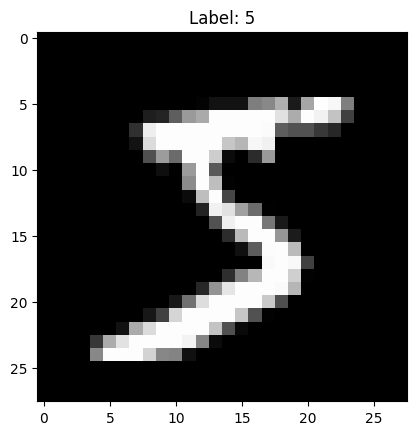

In [ ]:
# 33. Write a Python program to load the MNIST dataset and display the first image.

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display first image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

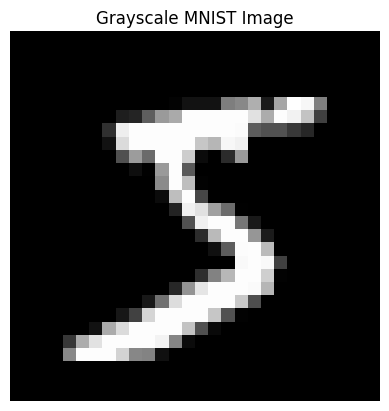

In [ ]:
# 34. Write a Python program to plot a grayscale image using matplotlib from the MNIST dataset.

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST data
(x_train, y_train), _ = mnist.load_data()

# Plot first image in grayscale
plt.imshow(x_train[0], cmap='gray')
plt.title("Grayscale MNIST Image")
plt.axis('off')
plt.show()

In [ ]:
# 35. Write a Python program to train the CNN model for one epoch using the MNIST dataset.

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build simple CNN
model = Sequential([
    Conv2D(8, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train for 1 epoch
model.fit(x_train, y_train, epochs=1, batch_size=64)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8191 - loss: 0.7157


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


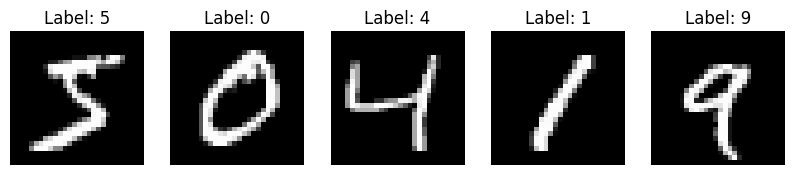

In [ ]:
# 36. Write a Python program to
# a. Print the shape of the MNIST dataset.
# b. Display the first 5 images in a single row with their labels.

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# (a) Print dataset shape
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# (b) Display first 5 images with labels
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
# 37. Write a Python program to build a simple Convolutional Neural Network (CNN)
# using Keras for MNIST images.

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 38. Write a Python program to plot a diagram of the CNN model architecture.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model

model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

plot_model(model, to_file='cnn_model.png', show_shapes=True)
print("CNN model diagram saved as cnn_model.png")

CNN model diagram saved as cnn_model.png


938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.8826 - loss: 0.4214 - val_accuracy: 0.9756 - val_loss: 0.0783


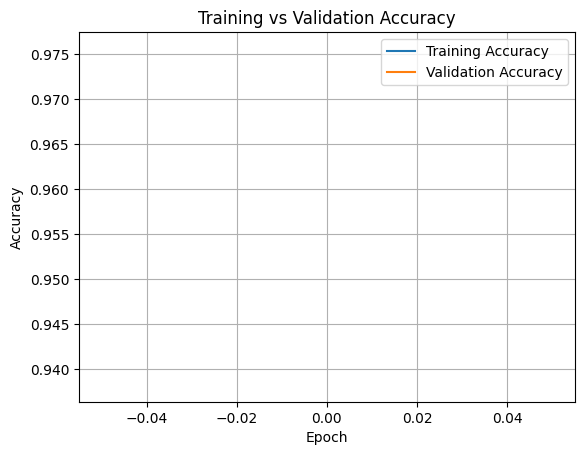

CNN model trained for one epoch and accuracy plot saved as 'cnn_training_accuracy.png'


In [ ]:
# 39. Write a Python program to train the CNN model for one epoch using the MNIST dataset
# and save the training accuracy plot as an image (PNG/JPEG).

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize input data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model for 1 epoch
history = model.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test))

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Save the plot as an image (PNG format)
plt.savefig("cnn_training_accuracy.png")
plt.show()

print("CNN model trained for one epoch and accuracy plot saved as 'cnn_training_accuracy.png'")

In [ ]:
# 40. Write a Python program to evaluate the trained CNN model again on the training data.

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize input data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the same CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train for 1 epoch
model.fit(x_train, y_train, epochs=1, batch_size=64, verbose=1)

# Evaluate the model on training data
loss, accuracy = model.evaluate(x_train, y_train, verbose=0)

print("CNN Model Evaluation on Training Data:")
print("Training Loss:", round(loss, 4))
print("Training Accuracy:", round(accuracy * 100, 2), "%")


938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.8806 - loss: 0.4192
CNN Model Evaluation on Training Data:
Training Loss: 0.0765
Training Accuracy: 97.8 %


In [ ]:
# 41. Write a Python program to tokenize the text “Deep Learning is amazing” using Keras Tokenizer.

from tensorflow.keras.preprocessing.text import Tokenizer

text = ["Deep Learning is amazing"]
tok = Tokenizer()
tok.fit_on_texts(text)
print(tok.word_index)
print(tok.texts_to_sequences(text))

{'deep': 1, 'learning': 2, 'is': 3, 'amazing': 4}
[[1, 2, 3, 4]]


In [ ]:
# 42. Write a Python program to convert the given text into a sequence of integers using Keras Tokenizer.

from tensorflow.keras.preprocessing.text import Tokenizer

# Sample text data
texts = ["I love deep learning", "Deep learning loves me"]

# Create a Tokenizer object
tokenizer = Tokenizer()

# Fit the tokenizer on the text
tokenizer.fit_on_texts(texts)

# Convert the text to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

print("Word Index:", tokenizer.word_index)
print("Text to Integer Sequences:", sequences)

Word Index: {'deep': 1, 'learning': 2, 'i': 3, 'love': 4, 'loves': 5, 'me': 6}
Text to Integer Sequences: [[3, 4, 1, 2], [1, 2, 5, 6]]


In [ ]:
# 43. Train a simple RNN-based model to classify IMDB movie reviews as positive or negative.
# a. Load IMDB dataset
# b. Tokenize and pad sequences
# c. Train a model with SimpleRNN layer and evaluate accuracy

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Load the IMDB dataset (keeping top 10,000 words)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to make equal length
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

# Build the RNN model
model = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=200),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train for 1 epoch (for demo)
model.fit(x_train, y_train, epochs=1, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", round(acc * 100, 2), "%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.6435 - loss: 0.6303 - val_accuracy: 0.7074 - val_loss: 0.6104
Test Accuracy: 70.04 %


In [ ]:
# 44. Write a Python program to create a simple RNN model in Keras for text data.
# a. Print the summary of the RNN model.
# b. Save the created RNN model to a file.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Create a simple RNN model
model = Sequential([
    Embedding(input_dim=5000, output_dim=32, input_length=100),
    SimpleRNN(16),
    Dense(1, activation='sigmoid')
])

# Print model summary
print("RNN Model Summary:")
model.summary()

# Save the model to a file
model.save("simple_rnn_model.keras")
print("RNN model saved successfully as 'simple_rnn_model.keras'")

RNN Model Summary:


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

RNN model saved successfully as 'simple_rnn_model.keras'


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


In [ ]:
# 45. Write a Python program to create an LSTM layer with 10 units using Keras.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

# Create a simple model with one LSTM layer (10 units)
model = Sequential([
    LSTM(10, input_shape=(5, 1))
])

# Display model summary
print("LSTM Model Summary:")
model.summary()

LSTM Model Summary:


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10)             │           480 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 480 (1.88 KB)

 Trainable params: 480 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 46. Add dropout to your LSTM layers to prevent overfitting and analyze its effect.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

# Dummy data
X = np.random.randn(100, 10, 8)
y = np.random.randn(100, 1)

# LSTM model with dropout
model = Sequential([
    LSTM(64, dropout=0.3, recurrent_dropout=0.3, input_shape=(10, 8)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=10, batch_size=16, verbose=1)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.8126
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6292
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7441
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8728
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8178
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8539
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6048
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6401
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6793
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6682


In [ ]:
# 47. Write a Python program to pad text sequences using pad_sequences from Keras.

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Some short text sentences
texts = ["I love AI", "AI is future", "Deep learning"]

# Create a tokenizer and convert text to numbers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
seq = tokenizer.texts_to_sequences(texts)

print("Original sequences:", seq)

# Pad all sequences to the same length
padded = pad_sequences(seq)

print("Padded sequences:\n", padded)

Original sequences: [[2, 3, 1], [1, 4, 5], [6, 7]]
Padded sequences:
 [[2 3 1]
 [1 4 5]
 [0 6 7]]


In [ ]:
# 48. Write a Python program to compute the vocabulary size of the tokenizer.

from tensorflow.keras.preprocessing.text import Tokenizer

texts = ["Deep Learning is amazing", "I love AI and Deep Learning"]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token
print("Vocabulary size:", vocab_size)

Vocabulary size: 9


In [ ]:
# 49. Write a Python program to print a sequence of numbers from 1 to 10
# and also print its reversed version.

# Create a list of numbers from 1 to 10
numbers = list(range(1, 11))

print("Original sequence:", numbers)

# Print the reversed version
reversed_numbers = list(reversed(numbers))

print("Reversed sequence:", reversed_numbers)

Original sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Reversed sequence: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [ ]:
# 50. Write a short explanation of the encoder-decoder concept used in sequence-to-sequence models.

Encoder-Decoder Concept in Seq2Seq Models:

Encoder: Processes the input sequence and compresses it into a fixed-size context vector that captures the input information.

Decoder: Uses this context vector to generate the output sequence step by step.

This architecture is widely used in tasks like machine translation, text summarization, and chatbots, where input and output sequences may have different lengths.

Key Idea: The encoder “understands” the input, and the decoder “produces” the output based on that understanding.




# import torch, torch.nn as nn

# # Encoder
# encoder = nn.LSTM(input_size=10, hidden_size=20)
# # Decoder
# decoder = nn.LSTM(input_size=10, hidden_size=20)
# fc = nn.Linear(20, 10)

# # Forward pass
# x = torch.randn(5, 1, 10)
# _, (h, c) = encoder(x)
# y = torch.randn(5, 1, 10)
# out, _ = decoder(y, (h, c))
# out = fc(out)
# print(out.shape)

torch.Size([5, 1, 10])
